# Analysis of Mental Health in Technology 
#### Kaylynn Crawford 

Visualization (analysis to come) here: https://silentttone.github.io/MentalHealth/

I'm using a dataset about mental health in technology to try to answer the question: what company policies are most effective in encouraging employees to get help for mental health disorders, if necessary? To do this I created a decision tree with "Treatment" as a response variable. 

Currently, I think the results are a bit muddled by variables that are too predictive, such as "Do you currently have a mental disorder." One of my next steps will be picking variables specific to company policy and seeing how useful the resulting tree is. 

### To Do: 
* Filter variables used
* Interpret results

### Current Issues
* Best way to deal with null values (currently: removing them)
* Best way to create treatment variable - should I remove rows with no mental health problems? 
* Does my factorization method create arbitrary ordering? 

### Further steps? 
 * Try this in R and compare results 
 * Remove "too helpful" variables 

In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import graphviz

from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import confusion_matrix, mean_squared_error

%matplotlib inline

/home/kaylynn/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


### Read in data and correct data types

In [147]:
data = pd.read_csv('../data/mentalHealth.csv')

colNames = list(data.columns.values)

for n in colNames: 
    if (data[n].dtype == object):
        data[n] = data[n].astype('category')   

### Deal with NaN Values

Current approach is only using rows without any

In [150]:
data = data.dropna(axis=1,how='any')

# TODO: Is this the best way to deal with null values? 
# Another option: 
# data['NumEmp'].fillna(-1, inplace=True)

### Prepare variables for model

If person says they do not have a mental disorder, the treatment response variable is set to -1, because it's not applicable. 

Factorize categorical variables. 

In [151]:
# TODO: Figure out if this is the best way to handle this. Other options: remove row? 
data.ix[data.CurMental == "No", 'Treatment'] = -1

In [152]:
# TODO: Does this impose arbitrary ordering? 
# Reference: https://gist.github.com/ramhiser/982ce339d5f8c9a769a0

factorizedData = pd.DataFrame()

colNames = list(data.columns.values)

for n in colNames: 
    if (str(data[n].dtype) == 'category'):
        newCat = n + "_enc"
        catenc = pd.factorize(data[n])
        factorizedData[newCat] = catenc[0]
    else:
        factorizedData[n] = data[n]
        

### Create training and test set

In [153]:
X = factorizedData.drop(['Treatment'], axis=1)
y = data.Treatment

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5, random_state=0)

### Create decision tree

In [156]:
clf = DecisionTreeClassifier(max_depth=6)
clf.fit(X_train, y_train)
clf.score(X_train, y_train)

0.94692737430167595

### Visualize tree

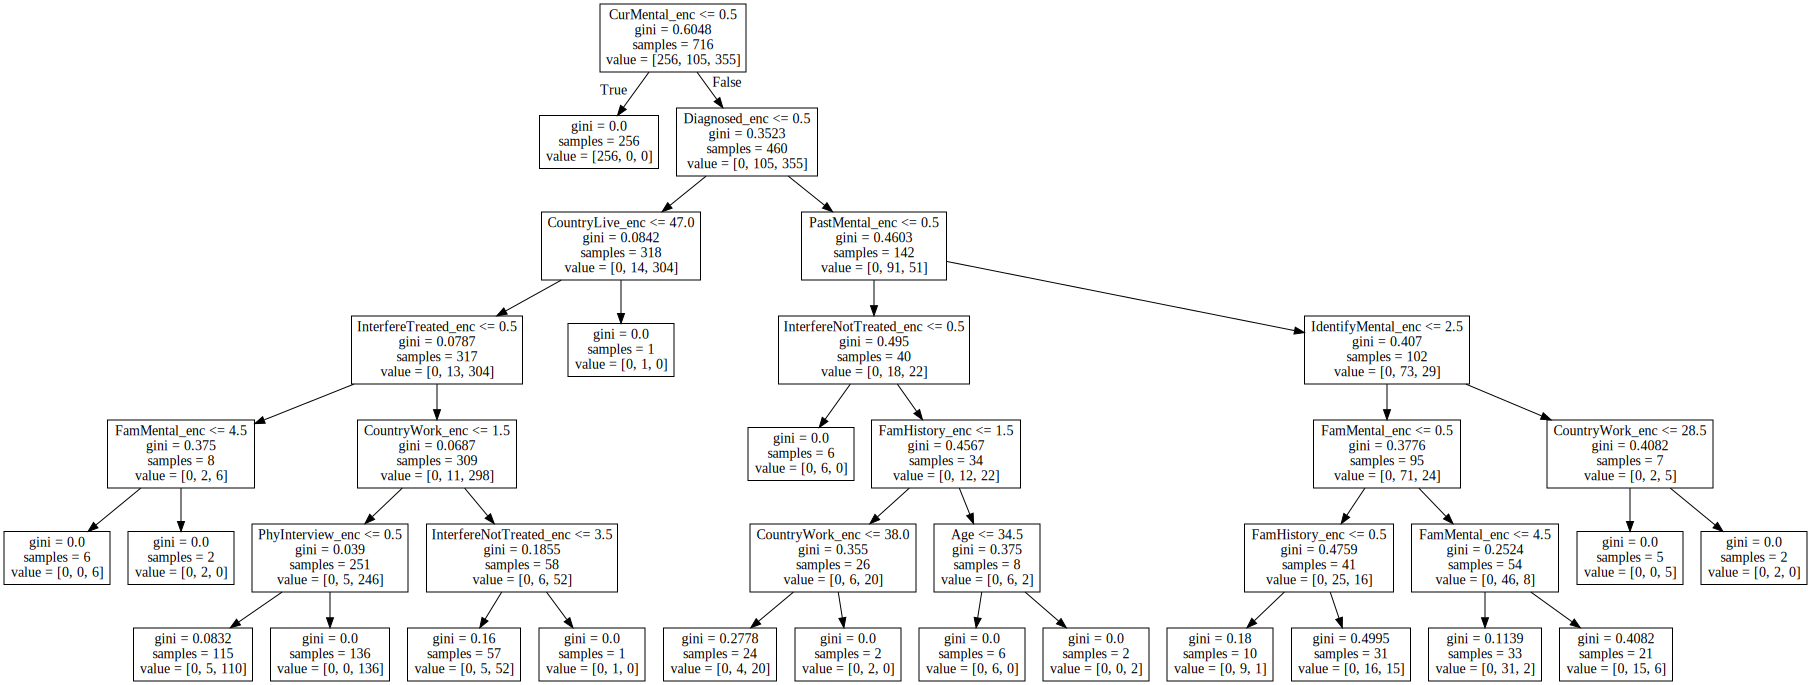

In [157]:
export_graphviz(clf, out_file="mytree.dot", feature_names=X_train.columns)
with open("mytree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)